In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [4]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [6]:
X = data.drop('quality',axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [7]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)
DTC_acc =cross_val_score(DTC, X_test, y_test, cv=5, scoring='accuracy')

BC = BaggingClassifier(n_estimators=100, random_state=42)
BC.fit(X_train, y_train)
BC_pred = BC.predict(X_test)
BC_acc = cross_val_score(BC, X_test, y_test, cv=5, scoring='accuracy')

RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train, y_train)
RFC_red = RFC.predict(X_test)
RFC_acc =cross_val_score(RFC, X_test, y_test, cv=5, scoring='accuracy')

In [8]:
acc_DT = DTC_acc.mean()
acc_BC = BC_acc.mean()
acc_RF = RFC_acc.mean()
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_BC]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [9]:
n_estimators = [10, 50, 100] + list(range(200, 5001, 200))
print(n_estimators)

[10, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000]


In [10]:
RF_accuracy = []
for i in n_estimators:
    RF_temp = RandomForestClassifier(n_estimators=i, random_state=RANDOM_STATE)
    RF_temp.fit(X_train, y_train)
    RF_temp_acc = cross_val_score(RF_temp, X_test, y_test, cv=5, scoring='accuracy')
    RF_accuracy.append(RF_temp_acc.mean())

Text(0, 0.5, 'Accuracy')

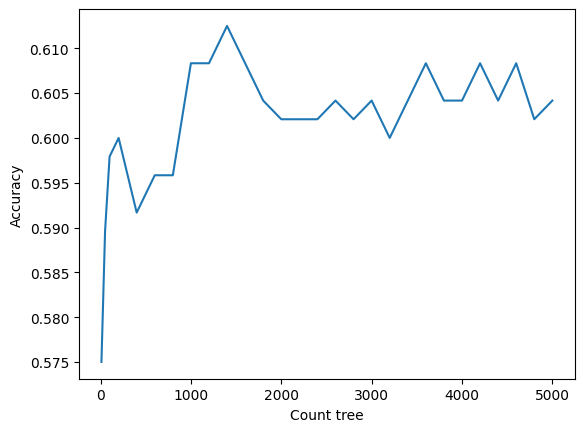

In [11]:
import matplotlib.pyplot as plt

plt.plot(n_estimators, RF_accuracy)
plt.xlabel('Count tree')
plt.ylabel('Accuracy')

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [13]:
# GradientBoostingClassifier / sklearn
GBC = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
GBC_pred = GBC.predict(X_test)
GBC_acc = cross_val_score(GBC, X_test, y_test, cv=5, scoring='accuracy')

# xgboost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
le.inverse_transform(y_train_xgb)

XGB = XGBClassifier(random_state=42).fit(X_train, y_train_xgb)
XGB_pred = XGB.predict(X_test)
XGB_acc = cross_val_score(XGB, X_train, y_train_xgb, cv=5, scoring='accuracy')

In [14]:
acc_sklearn = GBC_acc.mean()
acc_xgboost = XGB_acc.mean()
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [15]:
parameters = {'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2], 
              'n_estimators':[1, 5, 10, 100, 200, 300],
              'max_depth': np.arange(1,3,1)
              }

In [16]:
from sklearn.model_selection import GridSearchCV

GB_best = GridSearchCV(GradientBoostingClassifier(random_state=42), cv=3,
                            param_grid=parameters,
                            scoring=('accuracy'))
GB_best.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'max_depth': array([1, 2]),
                         'n_estimators': [1, 5, 10, 100, 200, 300]},
             scoring='accuracy')

In [17]:
XGB_best = GridSearchCV(XGBClassifier(random_state=42), cv=3,
                            param_grid=parameters,
                            scoring=('accuracy'))
XGB_best.fit(X_train, y_train_xgb)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'max_depth': array([1, 2]),
                         'n_estimators': [1, 5, 10, 100, 200, 300]},
             scoring='accuracy')

In [18]:
GB_best_acc = cross_val_score(GB_best, X_test, y_test, cv=5, scoring='accuracy')

In [19]:
XGB_best_acc = cross_val_score(XGB_best, X_train, y_train_xgb, cv=5, scoring='accuracy')

In [20]:
acc_sklearn_cv = GB_best_acc.mean()
acc_xgboost_cv = XGB_best_acc.mean()
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [21]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [22]:
LiGBM = LGBMClassifier(random_state=42, verbose=-100)
LiGBM.fit(X_train, y_train)
y_LiGBM_pred = LiGBM.predict(X_test)
LiGBM_acc = cross_val_score(LiGBM, X_test, y_test, cv=5, scoring='accuracy')

In [23]:
CatBst = CatBoostClassifier(random_state=42, verbose=False)
CatBst.fit(X_train, y_train)
y_CatBst_pred = CatBst.predict(X_test)
CatBst_acc = cross_val_score(CatBst, X_test, y_test, cv=5, scoring='accuracy')

In [24]:
acc_lightgbm = LiGBM_acc.mean()
acc_catboost = CatBst_acc.mean()
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [25]:
parameters = {'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2], 
              'n_estimators':[1, 5, 10, 100, 200, 300],
              'max_depth': np.arange(1,3,1)
              }

LiGBM_best = GridSearchCV(LGBMClassifier(random_state=42, verbose=-100), cv=3,
                            param_grid=parameters,
                            scoring=('accuracy'))
LiGBM_best.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42, verbose=-100),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'max_depth': array([1, 2]),
                         'n_estimators': [1, 5, 10, 100, 200, 300]},
             scoring='accuracy')

In [26]:
CatBst_best = GridSearchCV(CatBoostClassifier(random_state=42, verbose=False), cv=3,
                            param_grid=parameters,
                            scoring=('accuracy'))
CatBst_best.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000024F73DD7A10>,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'max_depth': array([1, 2]),
                         'n_estimators': [1, 5, 10, 100, 200, 300]},
             scoring='accuracy')

In [27]:
LiGBM_best_acc = cross_val_score(LiGBM_best, X_test, y_test, cv=5, scoring='accuracy')

In [28]:
CatBst_best_acc = cross_val_score(CatBst_best, X_test, y_test, cv=5, scoring='accuracy')

In [29]:
acc_sklearn_cv = LiGBM_best_acc.mean()
acc_xgboost_cv = CatBst_best_acc.mean()

In [30]:
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_sklearn_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_xgboost_cv]

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [41]:
import optuna

def opt(trial):
    n_estimators = trial.suggest_int('n_estimators', 0, 500)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    learning_rate = trial.suggest_float('learning_rate', 0, 1.0)
    
    xgboost = XGBClassifier(random_state=42, 
                            tree_method='gpu_hist',
                            n_estimators = n_estimators,
                            max_depth = max_depth,
                            learning_rate = learning_rate,
                            )
    return cross_val_score(xgboost, X_train, y_train_xgb, cv=3, scoring='accuracy').mean()
study = optuna.create_study(direction="maximize")
study.optimize(opt, n_trials=23)

[I 2024-09-23 00:47:32,833] A new study created in memory with name: no-name-4ba488d7-5704-47e8-bdf1-e29c2676a9e1
[I 2024-09-23 00:47:34,831] Trial 0 finished with value: 0.6318141197497765 and parameters: {'n_estimators': 76, 'max_depth': 3, 'learning_rate': 0.9367662978272925}. Best is trial 0 with value: 0.6318141197497765.
[I 2024-09-23 00:47:42,097] Trial 1 finished with value: 0.6210902591599642 and parameters: {'n_estimators': 379, 'max_depth': 5, 'learning_rate': 0.7870603964402323}. Best is trial 0 with value: 0.6318141197497765.
[I 2024-09-23 00:47:43,449] Trial 2 finished with value: 0.6228775692582663 and parameters: {'n_estimators': 63, 'max_depth': 3, 'learning_rate': 0.9215549961568328}. Best is trial 0 with value: 0.6318141197497765.
[I 2024-09-23 00:47:45,493] Trial 3 finished with value: 0.6193029490616622 and parameters: {'n_estimators': 55, 'max_depth': 8, 'learning_rate': 0.5199940701008896}. Best is trial 0 with value: 0.6318141197497765.
[I 2024-09-23 00:47:49,62

In [42]:
XGBClas_optun_best = XGBClassifier(tree_method='gpu_hist',**study.best_params)
XGBClas_optun_best.fit(X_train, y_train_xgb)
XGBClas_optun_best_acc = cross_val_score(XGBClas_optun_best, X_train, y_train_xgb, cv=5, scoring='accuracy')

In [43]:
trial = study.best_trial
best_params_xgboost_optuna = trial.params

In [44]:
print('Параметры лучшей модели xgboost:', best_params_xgboost_optuna)
acc_xgboost_optuna = XGBClas_optun_best_acc.mean()
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

Параметры лучшей модели xgboost: {'n_estimators': 139, 'max_depth': 3, 'learning_rate': 0.7247211316479092}


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [35]:
from sklearn.ensemble import StackingClassifier

estimators = [('GradientBoostingClassifier', GradientBoostingClassifier()),
              ('XGBClassifier', XGBClassifier()),
              ('LGBMClassifier', LGBMClassifier(verbose=-100)),
              ('CatBoostClassifier', CatBoostClassifier(verbose=False))]
Stacking_models_default = StackingClassifier(estimators=estimators)
Stacking_models_default.fit(X_train, y_train)
Stacking_models_default_acc = cross_val_score(Stacking_models_default, X_train, y_train,cv=3, scoring='accuracy')

In [36]:
acc_stacking_default = Stacking_models_default_acc.mean()
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [37]:
estimators = [('GradientBoostingClassifier', GradientBoostingClassifier(**GB_best.best_params_)),
              ('XGBClassifier', XGBClassifier(**XGB_best.best_params_)),
              ('LGBMClassifier', LGBMClassifier(**LiGBM_best.best_params_, verbose=-100)),
              ('CatBoostClassifier', CatBoostClassifier(**CatBst_best.best_params_, verbose=False))]
Stacking_models_best = StackingClassifier(estimators=estimators)
Stacking_models_best.fit(X_train, y_train)
Stacking_models_best_acc = cross_val_score(Stacking_models_best, X_train, y_train,cv=3, scoring='accuracy')

In [38]:
acc_stacking = Stacking_models_best_acc.mean()
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [39]:
results[['model', 'accuracy']][results['accuracy'] == results['accuracy'].max()]

,model,accuracy
11,XGBClassifier_optuna,0.666716


In [45]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.535417
1,BaggingClassifier,task2,0.591667
2,RandomForestClassifier,task2,0.597917
3,GradientBoostingClassifier,task4,0.562500
4,XGBClassifier,task4,0.649732
5,GradientBoostingClassifier_CV,task5,0.587500
6,XGBClassifier_CV,task5,0.615787
7,LGBMClassifier,task6,0.570833
8,CatBoostClassifier,task6,0.575000
9,LGBMClassifier_CV,task7,0.568750
